In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Continuing from Project_analysis_actual-test.ipynb,

After doing some analysis with respect to the various labels in the actual test data. I will now perfrom the same analysis on total data with actual output values

In [2]:
df = pd.read_csv("Project_OP.csv")

In [3]:
X = df

In [4]:
X.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both
0,Alabama,10001,1,1,January,1,68.0,1,1,4,...,1,0,0,7,1,1,0,7,1,0
1,Alabama,10002,1,1,January,1,49.0,1,1,4,...,996,996,996,7,1,1,0,7,1,0
2,Alabama,10003,1,1,January,1,31.0,1,1,4,...,1,0,0,7,1,1,0,7,2,0
3,Alabama,10003,2,1,January,1,20.0,2,2,5,...,0,0,0,0,88,88,8,0,0,0
4,Alabama,10004,1,4,January,1,40.0,1,1,4,...,1,0,0,7,4,1,0,7,1,0


### Now I will convert the data in its nominal form using FARS user guide and perform analyisis on the distributions of the people involved in the crashes

In [5]:
X.columns

Index([u'STATE', u'ST_CASE', u'PER_NO', u'DAY', u'MONTH', u'RUR_URB', u'AGE',
       u'SEX', u'PER_TYP', u'INJ_SEV', u'DRINKING', u'ALC_DET', u'ALC_STATUS',
       u'ATST_TYP', u'ALC_RES', u'DRUGS', u'DRUGRES1', u'DRUGRES2',
       u'DRUGRES3', u'DOA', u'DEATH_DA', u'DEATH_MO', u'WORK_INJ', u'HISPANIC',
       u'RACE', u'both'],
      dtype='object')

1    1123
2     101
3      23
4      13
5       2
7       1
6       1
Name: PER_NO, dtype: int64

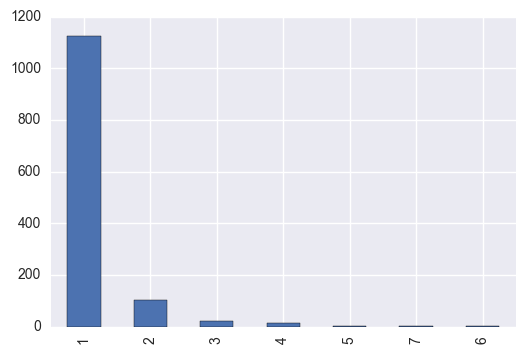

In [6]:
# Distribution of number of people in the vehicle involved in the crash
X[X['both']==1].PER_NO.value_counts().plot(kind='bar')
X[X['both']==1].PER_NO.value_counts()

26    52
12    52
18    50
13    49
1     48
25    48
20    47
14    46
3     45
8     45
11    44
23    44
17    42
5     42
16    42
22    42
28    41
2     41
27    40
7     38
21    36
10    36
6     36
19    35
9     35
29    35
30    33
4     31
15    30
31    30
24    29
Name: DAY, dtype: int64

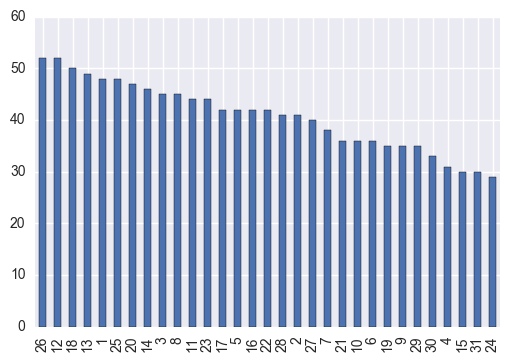

In [7]:
# Frequency distribution of days of a month involving crashes
X[X['both']==1].DAY.value_counts().plot(kind='bar')
X[X['both']==1].DAY.value_counts()

In [8]:
replacements = {
    'RUR_URB': {1:'Rural', 2:'Urban', 6:'Trafficway Not in State Inventory', 8:'Not Reported'},
    'SEX': {1:'Male', 2:'Female'}
    }
X.replace(replacements, regex=True, inplace=True)

Rural                                605
Urban                                601
Not Reported                          56
Trafficway Not in State Inventory      2
Name: RUR_URB, dtype: int64

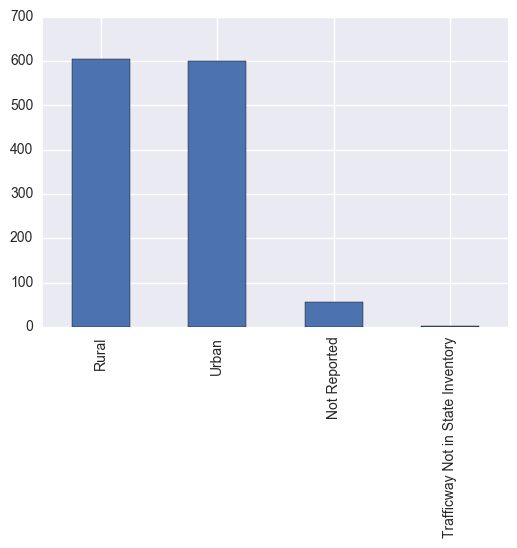

In [9]:
# Distribution of Urban/ Rural crashes
X[X['both']==1].RUR_URB.value_counts().plot(kind='bar')
X[X['both']==1].RUR_URB.value_counts()

Male      1030
Female     234
Name: SEX, dtype: int64

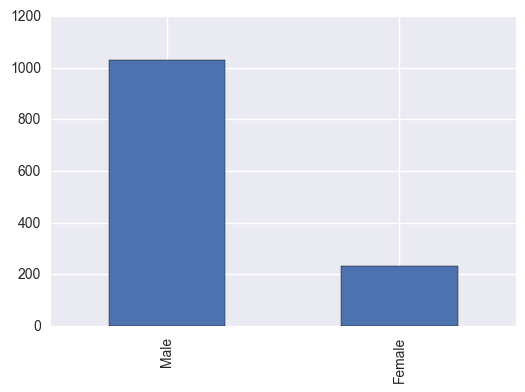

In [10]:
#Distirbution based on sex of person involved in the crash
X[X['both']==1].SEX.value_counts().plot(kind='bar')
X[X['both']==1].SEX.value_counts()

In [11]:
replacements = {
    'AGE': {39.27:'Not Reported', 1:'Less than one year'}
    }
X.replace(replacements, regex=True, inplace=True)

21.0            74
23.0            67
22.0            64
25.0            64
24.0            52
26.0            51
20.0            43
29.0            42
19.0            39
28.0            39
32.0            39
34.0            35
27.0            35
31.0            33
30.0            32
33.0            32
36.0            27
18.0            27
35.0            26
51.0            24
37.0            23
39.0            21
43.0            21
46.0            21
48.0            21
44.0            19
50.0            19
55.0            18
42.0            17
58.0            17
54.0            17
38.0            16
47.0            16
17.0            15
40.0            15
52.0            14
56.0            14
41.0            14
45.0            13
49.0            11
57.0            11
59.0            10
53.0             8
61.0             8
16.0             6
62.0             5
64.0             5
60.0             4
65.0             4
15.0             4
63.0             3
Not Reported     2
67.0        

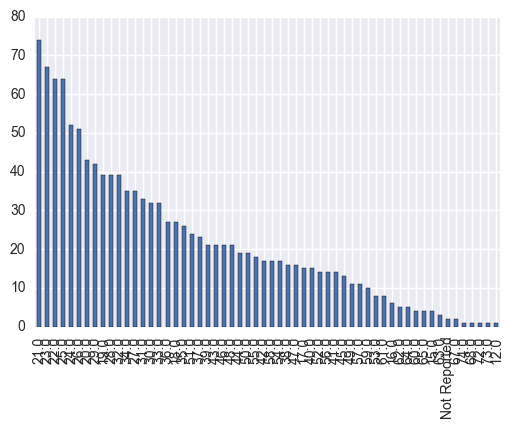

In [12]:
#Distribution based on age of the person
X[X['both']==1].AGE.value_counts().plot(kind='bar')
X[X['both']==1].AGE.value_counts()

Driver of a Motor Vehicle In-Transport       911
Pedestrian                                   187
Passenger of a Motor Vehicle In-Transport    137
Others                                        29
Name: PER_TYP, dtype: int64

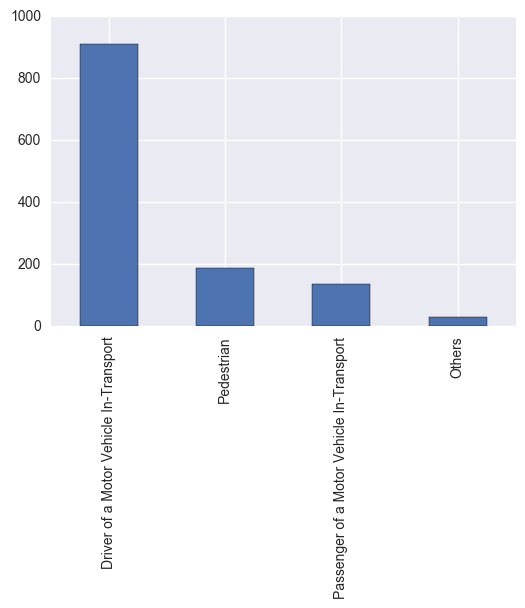

In [13]:
replacements = {
     'PER_TYP': {1:'Driver of a Motor Vehicle In-Transport', 2:'Passenger of a Motor Vehicle In-Transport',               
                5:'Pedestrian', 7:'Others'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on Type of the person
X[X['both']==1].PER_TYP.value_counts().plot(kind='bar')
X[X['both']==1].PER_TYP.value_counts()

Test Given        1260
Test Not Given       4
Name: ALC_STATUS, dtype: int64

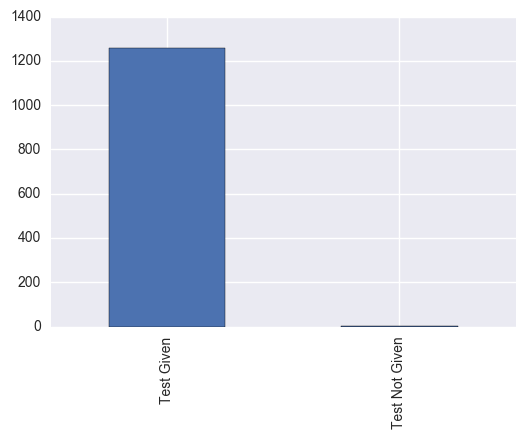

In [14]:
replacements = {
    'ALC_STATUS': {0:'Test Not Given', 2:'Test Given'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the person has given alcohol test or not
X[X['both']==1].ALC_STATUS.value_counts().plot(kind='bar')
X[X['both']==1].ALC_STATUS.value_counts()

Fatal Injury    1264
Name: INJ_SEV, dtype: int64

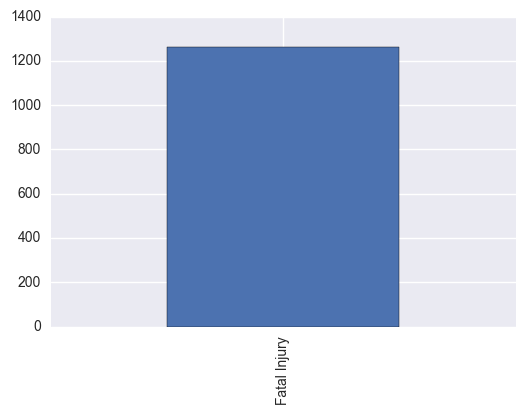

In [15]:
replacements = {
     'INJ_SEV': {0:'No Apparent Injury', 1:'Possible Injury', 2:'Suspected Minor Injury', 3:'Suspected Serious Injury',
                4:'Fatal Injury', 5:'Injured'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on injury of the person involved in the crash
X[X['both']==1].INJ_SEV.value_counts().plot(kind='bar')
X[X['both']==1].INJ_SEV.value_counts()

Yes             707
Not Reported    426
No              131
Name: DRINKING, dtype: int64

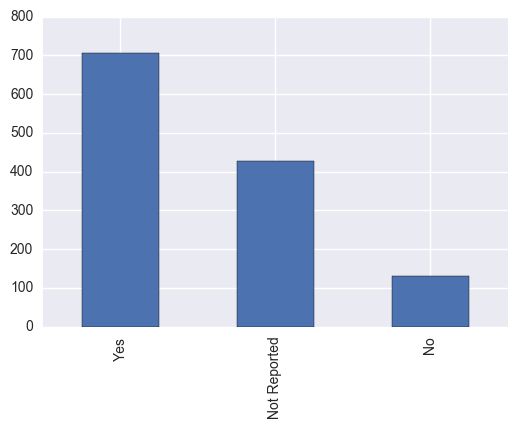

In [16]:
replacements = {
     'DRINKING': {0:'No', 1:'Yes', 8:'Not Reported'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the person was drining or not
X[X['both']==1].DRINKING.value_counts().plot(kind='bar')
X[X['both']==1].DRINKING.value_counts()

Not Reported               821
Evidential Test            370
observed                    67
Other                        4
Preliminary Breath Test      2
Name: ALC_DET, dtype: int64

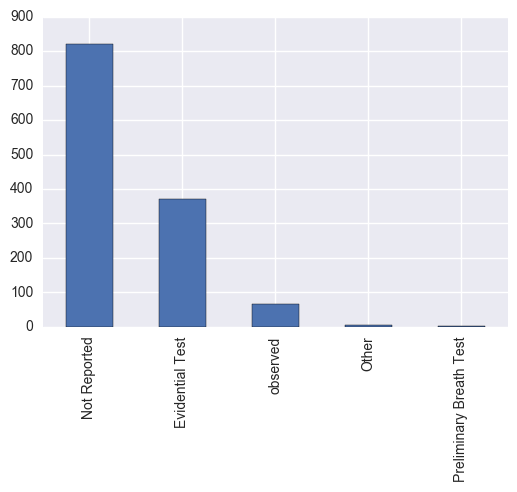

In [17]:
replacements = {
     'ALC_DET': {1:'Evidential Test',2:'Preliminary Breath Test', 3:'Behavioral', 4:'Passive Alcohol Sensor', 
                 5:'observed', 8:'Other', 9:'Not Reported',}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol test of the person involved in crash
X[X['both']==1].ALC_DET.value_counts().plot(kind='bar')
X[X['both']==1].ALC_DET.value_counts()

Blood Test           1231
Vitreous                9
Urine                   7
Not Reported            5
Unknown Test Type       4
Other                   3
Breath Test             2
10                      1
Blood Plasma            1
0                       1
Name: ATST_TYP, dtype: int64

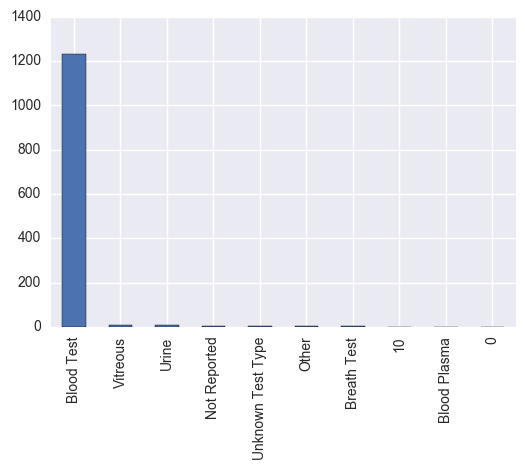

In [18]:
replacements = {
     'ATST_TYP': {1:'Blood Test',2:'Breath Test', 3:'Urine', 4:'Vitreous', 
                 5:'Blood Plasma', 8:'Other', 95:'Not Reported', 98:'Unknown Test Type'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol testtype of the person involved in crash
X[X['both']==1].ATST_TYP.value_counts().plot(kind='bar')
X[X['both']==1].ATST_TYP.value_counts()

Legally intoxicated    1110
Below illegal limit     138
None Given               16
Name: ALC_RES, dtype: int64

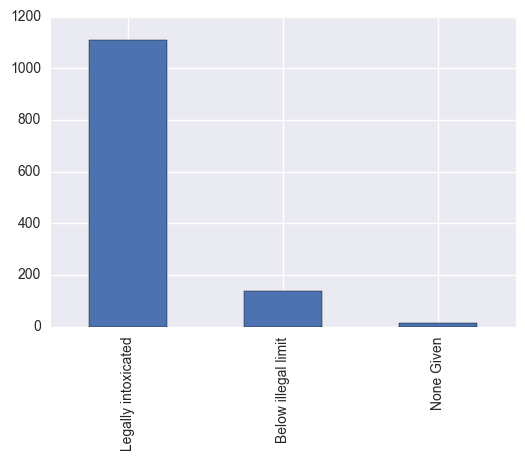

In [19]:
replacements = {
     'ALC_RES': {0.8:'Legally intoxicated',996:'None Given', 0:'Below illegal limit'}}
                 
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol test result of the person involved in crash
X[X['both']==1].ALC_RES.value_counts().plot(kind='bar')
X[X['both']==1].ALC_RES.value_counts()

Yes             426
Not Reported    347
No              262
Unknown         229
Name: DRUGS, dtype: int64

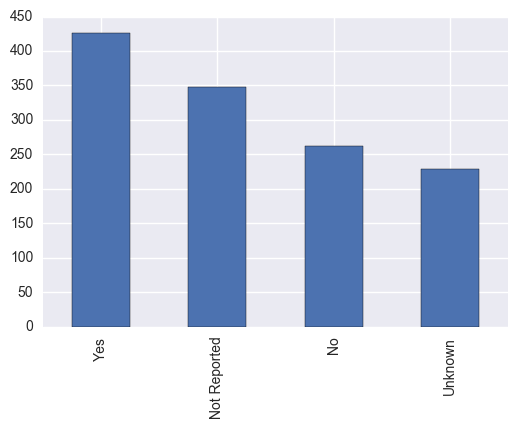

In [20]:
replacements = {
     'DRUGS': {0:'No', 1:'Yes', 8:'Not Reported', 9:'Unknown'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the if the person has take drug test or not
X[X['both']==1].DRUGS.value_counts().plot(kind='bar')
X[X['both']==1].DRUGS.value_counts()

Cannabinoid    1012
Other Drugs     252
Name: DRUGRES1, dtype: int64

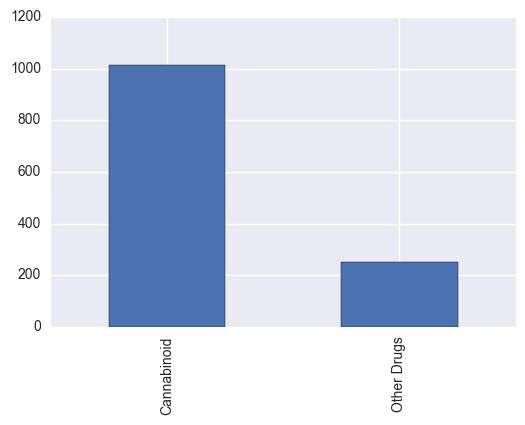

In [21]:
replacements = {
     'DRUGRES1': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES1.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES1.value_counts()

Not Tested for Drugs    626
Cannabinoid             402
Other Drugs             236
Name: DRUGRES2, dtype: int64

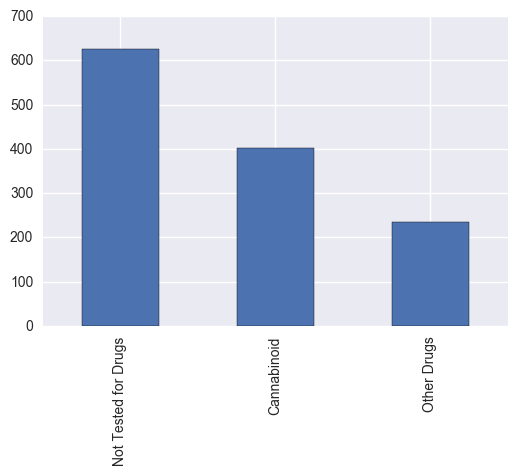

In [22]:
replacements = {
     'DRUGRES2': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES2.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES2.value_counts()

Not Tested for Drugs    1002
Cannabinoid              152
Other Drugs              109
Reported Negative          1
Name: DRUGRES3, dtype: int64

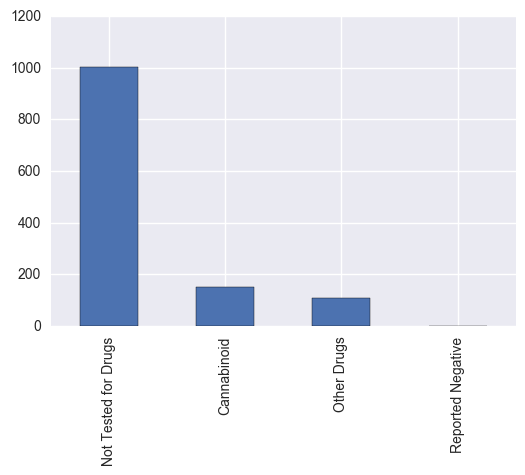

In [23]:
replacements = {
     'DRUGRES3': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES3.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES3.value_counts()

Died at Scene     919
Not Applicable    332
Died En Route      13
Name: DOA, dtype: int64

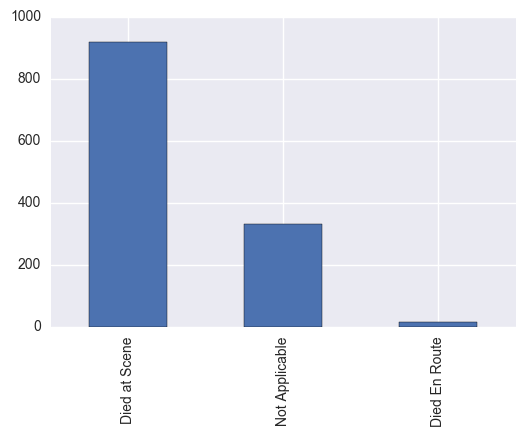

In [24]:
replacements = {
     'DOA': {0:'Not Applicable', 7:'Died at Scene', 8:'Died En Route'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DOA.value_counts().plot(kind='bar')
X[X['both']==1].DOA.value_counts()

12    51
18    51
14    49
20    49
25    48
1     47
28    46
13    46
26    44
8     44
23    44
11    44
2     42
22    42
5     41
6     41
16    41
27    41
3     40
17    39
19    38
21    37
10    37
9     37
7     36
29    36
4     33
30    32
15    30
31    29
24    27
88     2
Name: DEATH_DA, dtype: int64

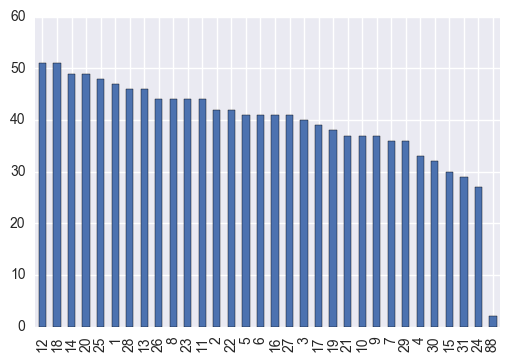

In [25]:
#Distribution based on day of month when death of person occured, as reported by authorities
X[X['both']==1].DEATH_DA.value_counts().plot(kind='bar')
X[X['both']==1].DEATH_DA.value_counts()

In [26]:
replacements = {
     'DEATH_DA': {88:'Not reported'}
          }
X.replace(replacements, regex=True, inplace=True)

8     141
10    133
5     132
4     118
6     108
7     106
9     104
3     100
1      93
11     89
12     73
2      65
88      2
Name: DEATH_MO, dtype: int64

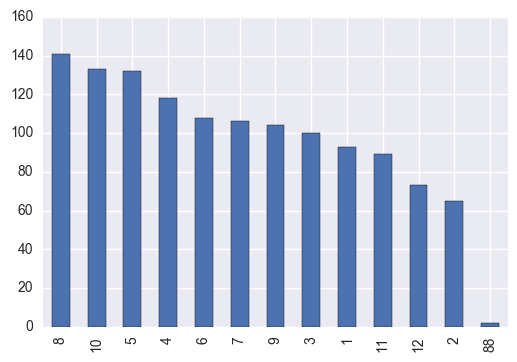

In [27]:
#Distribution based on the month of death
X[X['both']==1].DEATH_MO.value_counts().plot(kind='bar')
X[X['both']==1].DEATH_MO.value_counts()

In [28]:
replacements = {
     'DEATH_MO': {88:'Not reported'}
          }
X.replace(replacements, regex=True, inplace=True)

No                1155
Not Applicable     105
Yes                  4
Name: WORK_INJ, dtype: int64

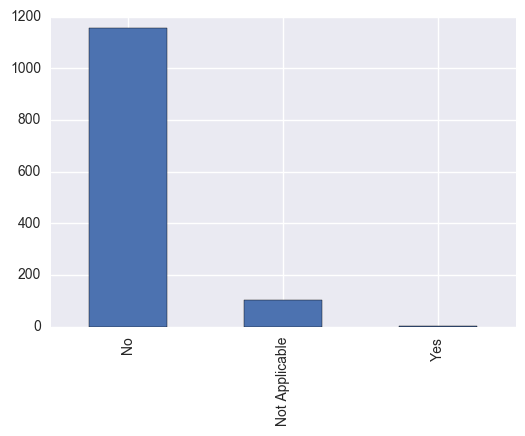

In [29]:
replacements = {
     'WORK_INJ': {0:'No', 1:'Yes', 8:'Not Applicable'},
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the crash occured when the preson was at work
X[X['both']==1].WORK_INJ.value_counts().plot(kind='bar')
X[X['both']==1].WORK_INJ.value_counts()

White              854
Black              216
All Other Races    182
Asian               12
Name: RACE, dtype: int64

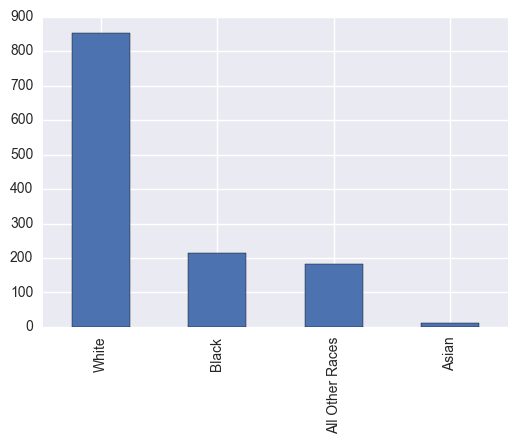

In [30]:
replacements = {
     'RACE': {0:'Not A Fatality', 1:'White', 2:'Black',98:'All Other Races', 8:'Asian'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the Race of the person
X[X['both']==1].RACE.value_counts().plot(kind='bar')
X[X['both']==1].RACE.value_counts()

California              99
Ohio                    80
Texas                   79
South Carolina          79
Florida                 69
New York                58
Illinois                44
Kentucky                43
Missouri                43
Washington              42
Colorado                42
Wisconsin               39
Pennsylvania            37
Georgia                 36
Michigan                35
Virginia                31
Tennessee               30
Alabama                 30
Arkansas                29
Arizona                 23
New Mexico              22
Connecticut             21
New Jersey              20
Nevada                  19
Indiana                 17
Louisiana               17
Massachusetts           16
Utah                    15
Mississippi             15
Minnesota               14
Montana                 14
New Hampshire           13
WestVirginia            11
Iowa                    11
Delaware                10
Idaho                    8
Vermont                  8
N

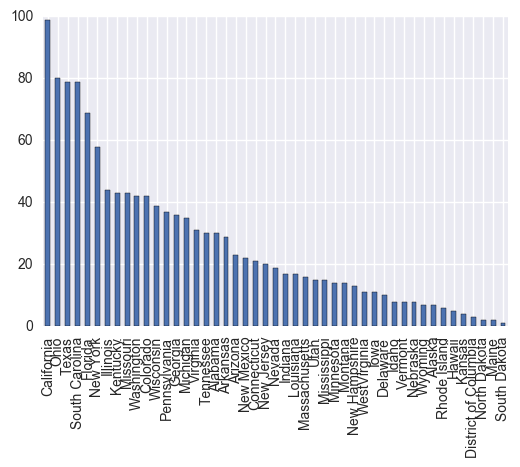

In [31]:
replacements = {
     'STATE': {1:'Alabama', 31:'Nebraska', 2:'Alaska', 32:'Nevada',4:'Arizona', 33:'New Hampshire', 5:'Arkansas', 34:'New Jersey',
             6: 'California', 35:'New Mexico', 8:'Colorado', 36:'New York', 9:'Connecticut', 37:'North Carolina', 10:'Delaware',
             38:'North Dakota', 11:'District of Columbia', 39:'Ohio', 12:'Florida', 40:'Oklahoma', 13:'Georgia', 41:'Oregon',
             15:'Hawaii', 42:'Pennsylvania', 16:'Idaho', 43:'Puerto Rico', 17:'Illinois', 44:'Rhode Island', 18:'Indiana',
             45:'South Carolina', 19:'Iowa', 46:'South Dakota', 20:'Kansas', 47:'Tennessee', 21:'Kentucky', 48:'Texas', 
             22:'Louisiana', 49:'Utah', 23:'Maine', 50:'Vermont', 24:'Maryland', 52:'Virgin Islands', 25:'Massachusetts', 
             51:'Virginia', 26:'Michigan', 53:'Washington', 27:'Minnesota', 54:'WestVirginia', 28:'Mississippi',
             55:'Wisconsin', 29:'Missouri', 56:'Wyoming', 30:'Montana'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on STATE
X[X['both']==1].STATE.value_counts().plot(kind='bar')
X[X['both']==1].STATE.value_counts()

### Continuing in the Report